In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

Get data

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
#one image input and 10 for output because we have 10 typr of fashion__
train_data[0].shape 

(28, 28)

In [5]:
print(f'Train Data[0]\n{train_data[0]}\n')
print(f'is a type {train_labels[0]}')

Train Data[0]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

In [6]:
# https://github.com/zalandoresearch/fashion-mnist
totype = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
import matplotlib.pyplot as plt

'Shirt'

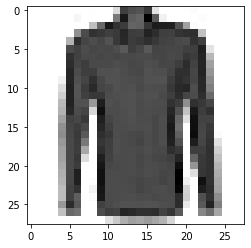

In [8]:
data = 40
plt.imshow(train_data[data], cmap=plt.cm.binary)
totype[train_labels[data]]

In [9]:
import random
def RandomSet(train_data=train_data,train_labels=train_labels):
    plt.figure(figsize=(5,5))
    for i in range(1,5):
        ax = plt.subplot(2,2,i)
        index = random.choice(range(len(train_data)))
        plt.imshow(train_data[index], cmap=plt.cm.binary)
        plt.title(totype[train_labels[index]])
        plt.axis(False) # Remove Axis x and y

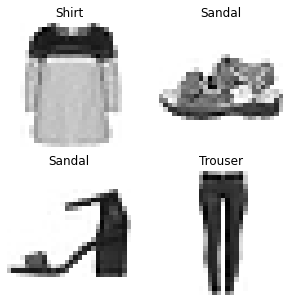

In [10]:
RandomSet()

### Build Model
* multi-classification
* with input shape (28,28)
* out put shape is (10,)
* **softmax** for output activation function cause multi-classifucation
* finally, use **SparseCategoricalCrossentropy** for loss function becuase labels is **integer form(0-9)**

In [11]:
#flatten data
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output.shape , 28*28

(TensorShape([None, 784]), 784)

In [12]:
tf.random.set_seed(42)

model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #flatten data 728
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model_1.compile(loss = keras.losses.SparseCategoricalCrossentropy(), #SparseCategoricalCrossentropy
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])

# the validation set, the model will try to predict but it won't update its weights (which means that it won't learn from them) 
nonnorm_history = model_1.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1641 - accuracy: 0.1614 - val_loss: 1.7904 - val_accuracy: 0.2057
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7082 - accuracy: 0.2508 - val_loss: 1.6529 - val_accuracy: 0.3032
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6356 - accuracy: 0.2873 - val_loss: 1.6381 - val_accuracy: 0.2845
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6063 - accuracy: 0.3011 - val_loss: 1.5996 - val_accuracy: 0.3098
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5919 - accuracy: 0.3132 - val_loss: 1.5742 - val_accuracy: 0.3316
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5837 - accuracy: 0.3140 - val_loss: 1.5633 - val_accuracy: 0.3113
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5805 - accuracy: 0.3188 - val_loss: 1.5622 - val_accuracy:

In [13]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_data.min(), train_data.max()

(0, 255)

### enhance model
* normalization (between zero and one)

In [15]:
train_data_norm, test_data_norm = (train_data/255.0), (test_data/255.0)
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [16]:
tf.random.set_seed(42)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #flatten data 728
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model_2.compile(loss = keras.losses.SparseCategoricalCrossentropy(), #SparseCategoricalCrossentropy
                optimizer = keras.optimizers.Adam(),
                metrics = ['accuracy'])

norm_history = model_2.fit(train_data_norm,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

>! Just **normalize** data then accuracy got to 80%

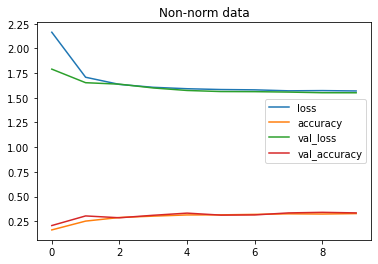

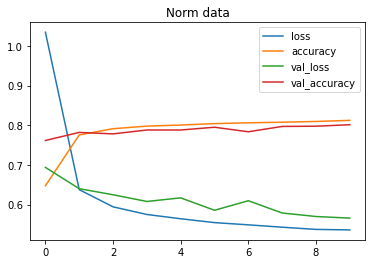

In [17]:
import pandas as pd

pd.DataFrame(nonnorm_history.history).plot(title='Non-norm data')
pd.DataFrame(norm_history.history).plot(title='Norm data');

### Fiding the ideal learning rate

In [18]:
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(train_data,
                               train_labels,
                               epochs=40, 
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1641 - accuracy: 0.1614 - val_loss: 1.7904 - val_accuracy: 0.2057 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7122 - accuracy: 0.2508 - val_loss: 1.6484 - val_accuracy: 0.3020 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6319 - accuracy: 0.2918 - val_loss: 1.5972 - val_accuracy: 0.3115 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6107 - accuracy: 0.2976 - val_loss: 1.5951 - val_accuracy: 0.3110 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6059 - accuracy: 0.3029 - val_loss: 2.0056 - val_accuracy: 0.2877 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6057 - accuracy: 0.3101 - val_loss: 1.5586 - val_accuracy: 0.3321 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

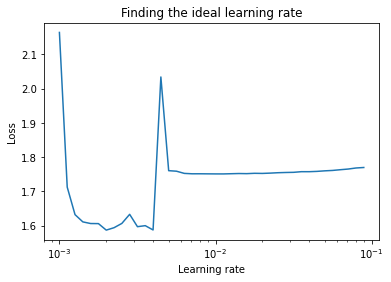

In [19]:
# Plot the learning rate versus the loss
import numpy as np

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

looking lr = 0.001 is ideal 

In [20]:
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
model4_history = model_4.fit(train_data_norm,
                               train_labels,
                               epochs=20, 
                               validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0966 - accuracy: 0.6275 - val_loss: 0.7959 - val_accuracy: 0.7328
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7063 - accuracy: 0.7535 - val_loss: 0.6690 - val_accuracy: 0.7627
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6184 - accuracy: 0.7861 - val_loss: 0.6178 - val_accuracy: 0.7841
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5817 - accuracy: 0.7986 - val_loss: 0.5948 - val_accuracy: 0.7950
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5615 - accuracy: 0.8047 - val_loss: 0.5959 - val_accuracy: 0.7876
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5451 - accuracy: 0.8095 - val_loss: 0.5637 - val_accuracy: 0.8024
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5350 - accuracy: 0.8119 - val_loss: 0.5496 - val_accuracy:

In [21]:
# ! don't do this with multi-classification
model_4.evaluate(test_data_norm) 

313/313 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

### Evaluating multi-classification
* confusion matrix

In [22]:
import itertools
from sklearn.metrics import confusion_matrix


def plot_confusin_metrix(y_true, y_pred, classes=None, figsize=(10,10),text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it , axis 1 = sum row
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [23]:
totype

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [101]:
# when we predict full data batch size = None , means it is a dynamic shape t can take any value depending on
y_probs = model_4.predict(test_data_norm)
y_probs[11] , test_labels[11]

(array([1.0183612e-04, 4.4053378e-10, 2.7683102e-05, 3.7423419e-07,
        7.2828215e-07, 9.7783196e-01, 1.4095867e-04, 8.0181258e-03,
        2.7202968e-03, 1.1158025e-02], dtype=float32),
 5)

index is have the most number is true probs labels

In [102]:
y_probs[11].argmax(), test_labels[11]

(5, 5)

In [26]:
y_pred = y_probs.argmax(axis=1) # axis 1 is in row
y_pred[:10], test_labels[:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,y_pred)
cm

array([[725,   1,  23,  89,   4,   2, 139,   1,  13,   3],
       [  1, 941,  10,  38,   8,   0,   0,   0,   2,   0],
       [ 16,   4, 734,  12, 129,   0, 101,   0,   4,   0],
       [ 38,  10,  12, 844,  36,   0,  55,   0,   5,   0],
       [  0,   4, 128,  27, 724,   0, 111,   0,   6,   0],
       [  0,   1,   0,   1,   0, 923,   0,  38,   6,  31],
       [137,   3, 132,  49, 102,   3, 544,   1,  28,   1],
       [  0,   0,   0,   0,   0,  43,   0, 913,   1,  43],
       [  5,   1,   0,   6,   1,  12,  40,   6, 928,   1],
       [  2,   0,   0,   0,   0,  24,   0,  35,   0, 939]], dtype=int64)

In [48]:
cm.sum(axis=1)[:,np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]], dtype=int64)

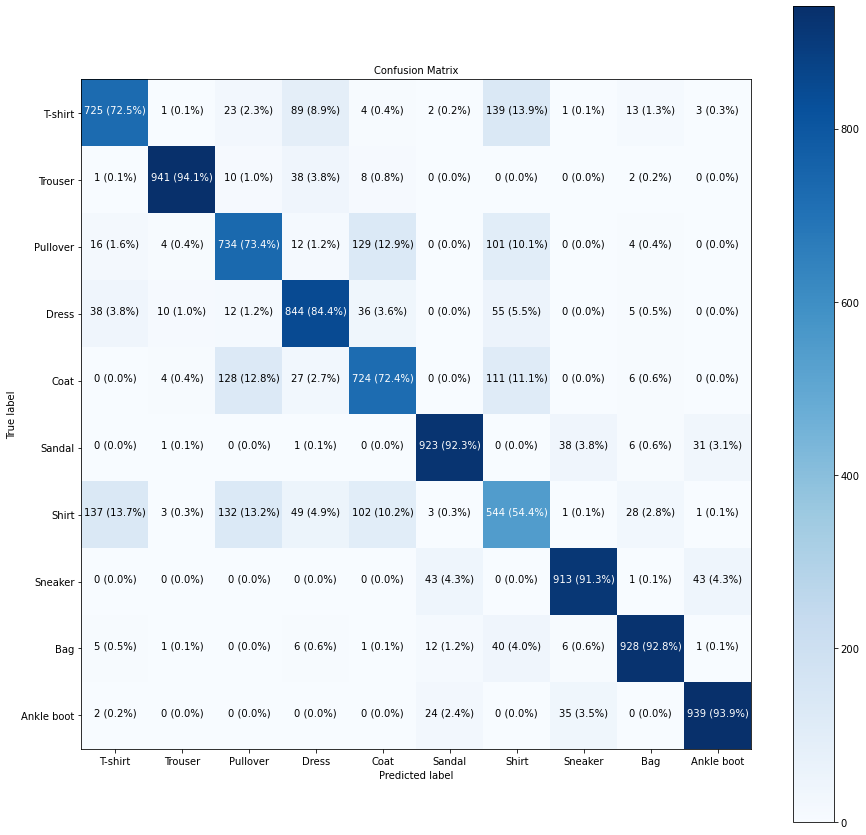

In [49]:
plot_confusin_metrix(test_labels,y_pred,classes=totype,figsize=(15,15),text_size=10)

In [123]:
test_data[10].shape

(28, 28)

In [147]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, test_data, test_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in test_data).
    test_data: a set of random images (in tensor form).
    test_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(test_data)) # 0 to 60000 depend on model
  
  # Create predictions and targets
  target_image = test_data[i]
  pred_probs = model.predict(target_image.reshape(1,28,28)) # have to reshape to get into right size for model 
  # one image prediction # (batch size,..,..) >> refers to the number of training examples utilized in one iteration
  # when we predict full data batch size = None , means it is a dynamic shape t can take any value depending on

  pred_label = classes[pred_probs.argmax()]
  true_label = classes[test_labels[i]]

  # Plot the target image
  plt.imshow(target_image)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "blue"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})",
             color=color) # set the color to blue or red

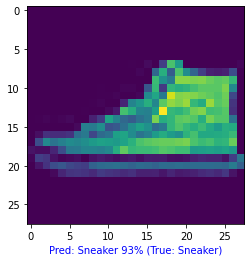

In [150]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4, 
                  test_data=test_data_norm, 
                  test_labels=test_labels, 
                  classes=totype)

In [144]:
weight, bias = model_4.layers[1].get_weights()
weight , weight.shape

(array([[ 0.79466134, -0.53290075,  0.52827364, -0.5078688 ],
        [ 0.65571415, -0.9378714 , -0.03041581,  0.0205456 ],
        [ 0.9758857 , -0.50979817, -0.15114583, -0.35570446],
        ...,
        [ 0.5982793 ,  0.7336096 , -0.25218114, -0.5898736 ],
        [ 0.3478078 ,  0.27296305,  0.31235892, -0.5814664 ],
        [ 0.78299046,  0.12814316, -0.6544623 , -0.2580593 ]],
       dtype=float32),
 (784, 4))

In [146]:
bias, bias.shape

(array([0.7101358 , 0.36187276, 0.6050522 , 0.66153675], dtype=float32), (4,))